In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ECOv003_L3T_L4T_JET import load_ECOv002_calval_JET_outputs, INPUT_VARIABLES

In [2]:
df = load_ECOv002_calval_JET_outputs()
df

,Unnamed: 0,ID,vegetation,climate,STICinst,BESSinst,MOD16inst,PTJPLSMinst,ETinst,ETinstUncertainty,...,ET_daylight_PMJPL_kg,G_PMJPL_Wm2,G_Wm2,LE_instantaneous_Wm2,ET_daylight_kg,ET_uncertainty,GPP_inst_g_m2_s,ET_canopy_inst_kg_m2_s,WUE,AuxiliaryNWP
0,0,US-NC3,ENF,Cfa,270.345200,78.53355,392.851840,307.021970,487.383423,118.916280,...,3.933367,60.425858,60.425858,351.448461,4.144935,0.773774,0.000212,0.000109,1.943556,NaN
1,1,US-Mi3,CVM,Dfb,232.141600,229.20093,640.118470,375.089300,106.825577,167.919460,...,3.776753,99.328964,99.328964,326.039533,4.279363,1.239315,0.000269,0.000111,2.421845,NaN
2,2,US-Mi3,CVM,Dfb,356.355740,335.23154,625.661700,284.686250,NaN,132.936340,...,3.507920,94.519459,94.519459,335.227024,4.353823,0.920482,0.000251,0.000044,5.670131,NaN
3,3,US-Mi3,CVM,Dfb,332.938400,326.68680,624.254330,251.414490,178.827545,141.132420,...,3.951060,78.277108,78.277108,332.815927,4.433066,0.372526,0.000303,0.000049,6.158837,NaN
4,4,US-Mi3,CVM,Dfb,286.854030,237.21654,511.082180,228.520170,154.791626,114.809410,...,4.161007,70.628272,70.628272,290.934683,4.244395,0.368856,0.000283,0.000058,4.846558,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,US-xAE,GRA,Cfa,70.923310,172.37459,81.645230,15.282976,NaN,56.385185,...,0.077304,5.985288,5.985288,35.172955,0.423263,0.427738,0.000006,0.000008,0.723558,NaN
1061,1061,US-xAE,GRA,Cfa,116.543190,121.81641,65.469320,22.186659,NaN,40.509410,...,0.009255,23.006297,23.006297,37.569789,0.815034,1.326901,0.000015,0.000012,1.260016,NaN
1062,1062,US-xAE,GRA,Cfa,129.880100,0.00000,118.777240,55.343586,NaN,52.403820,...,0.000800,43.185134,43.185134,27.267393,0.585193,0.710205,0.000041,0.000031,1.332510,NaN
1063,1063,US-xAE,GRA,Cfa,2.707851,140.38632,126.490524,40.434025,NaN,57.769722,...,0.034298,28.164673,28.164673,58.151051,1.076441,0.606770,0.000024,0.000023,1.048858,NaN


In [3]:
[column for column in df.columns if "insitu" in column]

['insitu_LE_Wm2',
 'insitu_H_Wm2',
 'insitu_Rn_Wm2',
 'insitu_G_Wm2',
 'insitu_SWin_Wm2',
 'insitu_Ta_C',
 'insitu_RH',
 'insitu_Rn_daylight_Wm2',
 'insitu_LE_daylight_Wm2',
 'insitu_ET_daylight_kg']

In [4]:
df["Ta_C_error"] = df["Ta_C"] - df["insitu_Ta_C"]
df[["Ta_C", "insitu_Ta_C", "Ta_C_error"]].head()

,Ta_C,insitu_Ta_C,Ta_C_error
0,32.658920,31.80107,0.857850
1,24.227982,26.23260,-2.004618
2,26.178862,30.26300,-4.084138
3,22.527096,23.63330,-1.106204
4,23.280691,24.33430,-1.053609


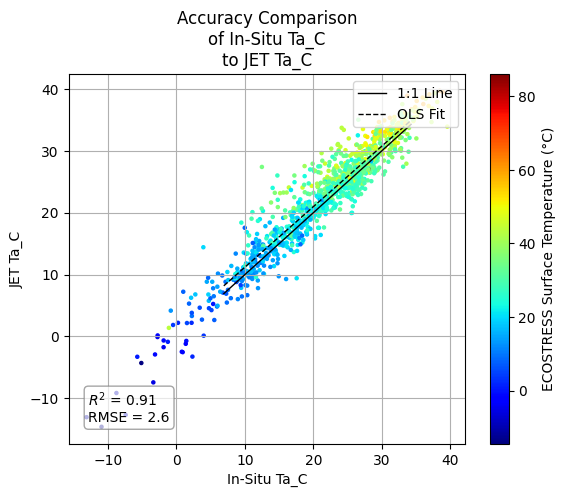

In [5]:
model_name = "JET"
x_variable = "insitu_Ta_C"
y_variable = "Ta_C"

# Filter out rows with NaN values in either variable
valid_data = df[[x_variable, y_variable, 'ST_C']].dropna()

sc = plt.scatter(
    x=valid_data[x_variable],
    y=valid_data[y_variable],
    c=valid_data.ST_C,
    cmap="jet",
    color=None,
    s=5
)

# Calculate 5% and 95% tails for x and y variables
x_5th, x_95th = np.percentile(valid_data[x_variable], [5, 95])
y_5th, y_95th = np.percentile(valid_data[y_variable], [5, 95])

min_val = min(x_5th, y_5th)
max_val = max(x_95th, y_95th)

# Add 1-to-1 line
# min_val = min(valid_data[x_variable].min(), valid_data[y_variable].min())
# max_val = max(valid_data[x_variable].max(), valid_data[y_variable].max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=1, label='1:1 Line')

# Add OLS regression line
coefs = np.polyfit(valid_data[x_variable], valid_data[y_variable], 1)
ols_x = np.array([min_val, max_val])
ols_y = coefs[0] * ols_x + coefs[1]
plt.plot(ols_x, ols_y, color='black', linestyle='--', linewidth=1, label='OLS Fit')

# Calculate R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
y_true = valid_data[y_variable]
y_pred = coefs[0] * valid_data[x_variable] + coefs[1]
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Annotate R-squared and RMSE on plot in lower left corner
plt.annotate(f"$R^2$ = {r2:.2f}\nRMSE = {rmse:.1f}",
            xy=(0.05, 0.05), xycoords='axes fraction',
            ha='left', va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.7))

plt.grid(True, zorder=0) 
plt.xlabel(f"In-Situ {y_variable}")
plt.ylabel(f"{model_name} {y_variable}")
plt.title(f"Accuracy Comparison\nof In-Situ {y_variable}\nto {model_name} {y_variable}")
plt.colorbar(sc, label="ECOSTRESS Surface Temperature (°C)")
plt.legend(loc='upper right')

plt.show()

In [6]:
for variable in INPUT_VARIABLES:
    print(variable, variable in df.columns)

AOT True
C4_fraction True
Ca True
CI True
COT True
IGBP True
KG_climate True
NDVI True
NDVI_maximum True
NDVI_minimum True
NIR_albedo True
PAR_albedo True
RH True
ST_C True
SZA_deg True
Ta_C True
Tmin_C True
Topt_C True
albedo True
ball_berry_intercept_C3 True
ball_berry_intercept_C4 False
ball_berry_slope_C3 True
ball_berry_slope_C4 True
canopy_height_meters True
canopy_temperature_C False
carbon_uptake_efficiency True
elevation_m True
emissivity True
fAPARmax True
field_capacity True
geometry True
kn True
ozone_cm True
peakVCmax_C3_μmolm2s1 False
peakVCmax_C4_μmolm2s1 False
soil_moisture False
soil_temperature_C False
time_UTC True
vapor_gccm True
wind_speed_mps True


In [7]:
# Correlations for INPUT_VARIABLES with Ta_C_error
vars_in_df = [v for v in INPUT_VARIABLES if v in df.columns]
numeric_vars = df[vars_in_df].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations and keep only finite values (no NaN, no inf)
corrs = df[numeric_vars].corrwith(df["Ta_C_error"])
input_var_corrs = (
    corrs[np.isfinite(corrs)]
    .sort_values(ascending=False)
    .rename("correlation")
    .to_frame()
)

input_var_corrs

,correlation
elevation_m,0.460818
kn,0.424642
carbon_uptake_efficiency,0.424642
ball_berry_intercept_C3,0.397332
ball_berry_slope_C4,0.386962
ST_C,0.256719
Ta_C,0.238243
IGBP,0.146300
wind_speed_mps,0.082730
PAR_albedo,0.046234


Stored top 10 positive correlations in 'top_positive_correlations'
Stored top 10 negative correlations in 'top_negative_correlations'

TOP 20 STRONGEST CORRELATIONS WITH Ta_C_error
(INPUT_VARIABLES Only, Real Values Only)

Top 10 Positive Correlations:
elevation_m                 0.460818
kn                          0.424642
carbon_uptake_efficiency    0.424642
ball_berry_intercept_C3     0.397332
ball_berry_slope_C4         0.386962
ST_C                        0.256719
Ta_C                        0.238243
IGBP                        0.146300
wind_speed_mps              0.082730
PAR_albedo                  0.046234
Name: correlation, dtype: float64

------------------------------------------------------------

Top 10 Negative Correlations:
KG_climate             -0.076874
vapor_gccm             -0.087943
Tmin_C                 -0.093888
NDVI                   -0.189977
canopy_height_meters   -0.219627
SZA_deg                -0.264361
NDVI_minimum           -0.296765
fAPARmax           

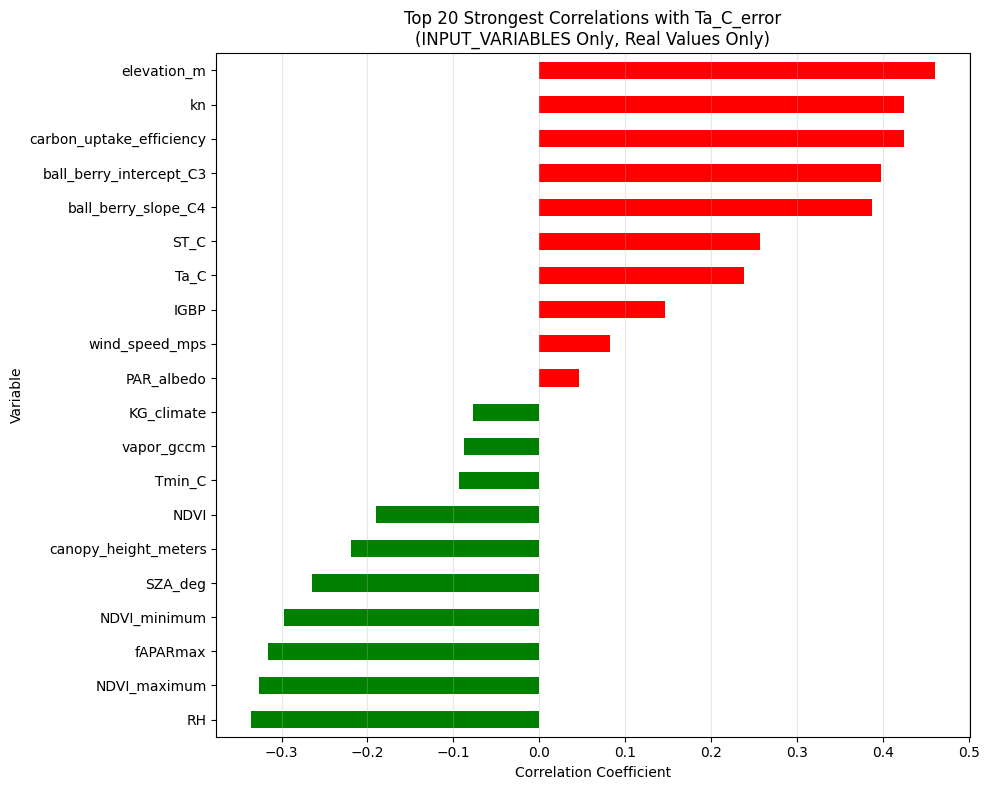

In [8]:
# Discover top strongest correlations with Ta_C_error
import seaborn as sns
import pandas as pd

top_n = 20  # Number of top correlations to display

# Use input_var_corrs which already has only variables with real correlation values
correlations = input_var_corrs['correlation']

# Store top correlations and anti-correlations for future use
top_positive_correlations = correlations.head(top_n//2)
top_negative_correlations = correlations.tail(top_n//2)

print(f"Stored top {top_n//2} positive correlations in 'top_positive_correlations'")
print(f"Stored top {top_n//2} negative correlations in 'top_negative_correlations'")
print()

# Display top correlations
print("=" * 60)
print(f"TOP {top_n} STRONGEST CORRELATIONS WITH Ta_C_error")
print("(INPUT_VARIABLES Only, Real Values Only)")
print("=" * 60)
print(f"\nTop {top_n//2} Positive Correlations:")
print(top_positive_correlations)
print("\n" + "-" * 60)
print(f"\nTop {top_n//2} Negative Correlations:")
print(top_negative_correlations)

# Visualize top n correlations (positive and negative combined)
fig, ax = plt.subplots(figsize=(10, 8))
top_correlations = pd.concat([top_positive_correlations, top_negative_correlations])
colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
top_correlations.sort_values().plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Variable')
ax.set_title(f'Top {top_n} Strongest Correlations with Ta_C_error\n(INPUT_VARIABLES Only, Real Values Only)')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


OLS REGRESSION COEFFICIENTS FOR Ta_C_error
                Variable  Coefficient
                fAPARmax    11.584007
              PAR_albedo     4.937105
                      kn     3.482848
     ball_berry_slope_C4     1.033252
              KG_climate     0.832976
 ball_berry_intercept_C3     0.161952
                    NDVI     0.127436
carbon_uptake_efficiency     0.116095
                    Ta_C     0.109122
             elevation_m     0.001006
                  Tmin_C    -0.019828
    canopy_height_meters    -0.021152
                    IGBP    -0.028629
                 SZA_deg    -0.045386
                    ST_C    -0.058307
          wind_speed_mps    -0.076864
              vapor_gccm    -0.127063
            NDVI_minimum    -0.966838
                      RH    -1.978171
            NDVI_maximum    -7.626360

Intercept: -6.433594

Model Performance:
R² = 0.4043
RMSE = 2.0077


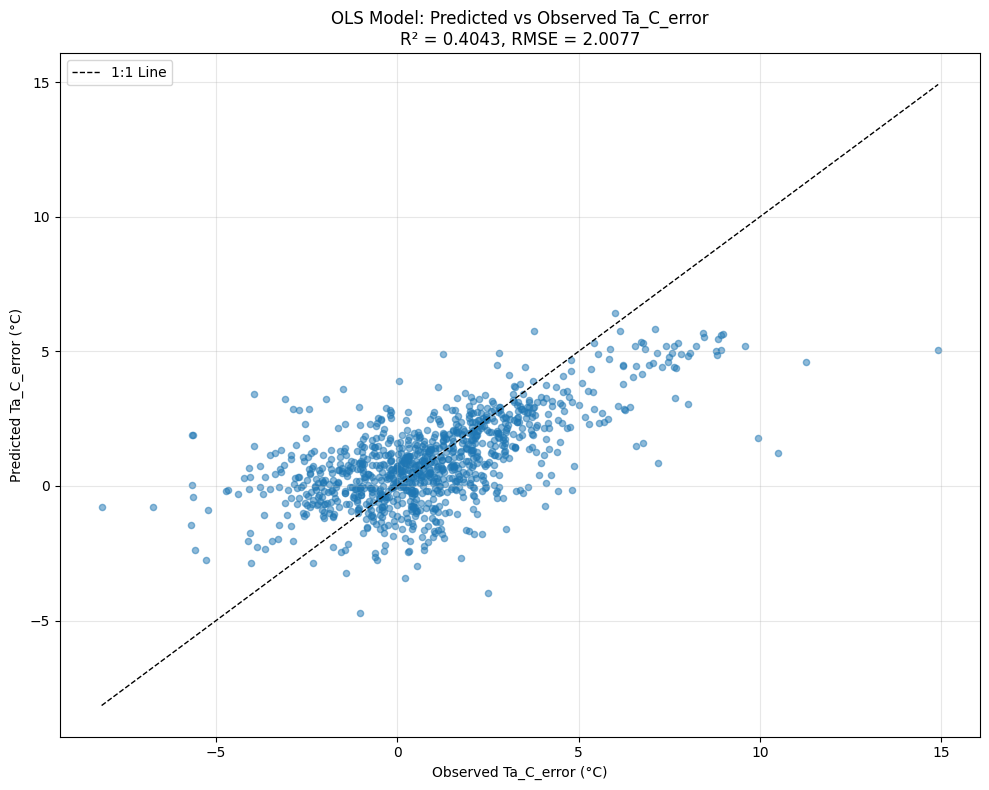

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Get the top correlating variables (both positive and negative)
top_corr_vars = top_correlations.index.tolist()

# Prepare data: remove rows with NaN in any of the top corr variables or Ta_C_error
X = df[top_corr_vars].dropna()
y = df.loc[X.index, "Ta_C_error"].dropna()

# Ensure X and y have the same index
common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Fit OLS regression
ols_model = LinearRegression()
ols_model.fit(X, y)

# Get coefficients
coef_df = pd.DataFrame({
    'Variable': top_corr_vars,
    'Coefficient': ols_model.coef_
}).sort_values('Coefficient', ascending=False)

print("=" * 60)
print("OLS REGRESSION COEFFICIENTS FOR Ta_C_error")
print("=" * 60)
print(coef_df.to_string(index=False))
print(f"\nIntercept: {ols_model.intercept_:.6f}")

# Generate predictions
y_pred_ols = ols_model.predict(X)

# Calculate metrics
r2_ols = r2_score(y, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y, y_pred_ols))

print(f"\nModel Performance:")
print(f"R² = {r2_ols:.4f}")
print(f"RMSE = {rmse_ols:.4f}")

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred_ols, alpha=0.5, s=20)

# Add 1:1 line
min_lim = min(y.min(), y_pred_ols.min())
max_lim = max(y.max(), y_pred_ols.max())
plt.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, label='1:1 Line')

plt.xlabel('Observed Ta_C_error (°C)')
plt.ylabel('Predicted Ta_C_error (°C)')
plt.title(f'OLS Model: Predicted vs Observed Ta_C_error\nR² = {r2_ols:.4f}, RMSE = {rmse_ols:.4f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

OLS                  | R² = 0.4043 | RMSE = 2.0077
Ridge                | R² = 0.4043 | RMSE = 2.0078
Lasso                | R² = 0.4020 | RMSE = 2.0116
ElasticNet           | R² = 0.4025 | RMSE = 2.0107
Random Forest        | R² = 0.8901 | RMSE = 0.8623
Gradient Boosting    | R² = 0.9460 | RMSE = 0.6045

MODEL PERFORMANCE SUMMARY
1. Gradient Boosting    | R² = 0.9460 | RMSE = 0.6045 | Improvement: +134.0%
2. Random Forest        | R² = 0.8901 | RMSE = 0.8623 | Improvement: +120.1%
3. OLS                  | R² = 0.4043 | RMSE = 2.0077 | Improvement: +0.0%
4. Ridge                | R² = 0.4043 | RMSE = 2.0078 | Improvement: -0.0%
5. ElasticNet           | R² = 0.4025 | RMSE = 2.0107 | Improvement: -0.4%
6. Lasso                | R² = 0.4020 | RMSE = 2.0116 | Improvement: -0.6%


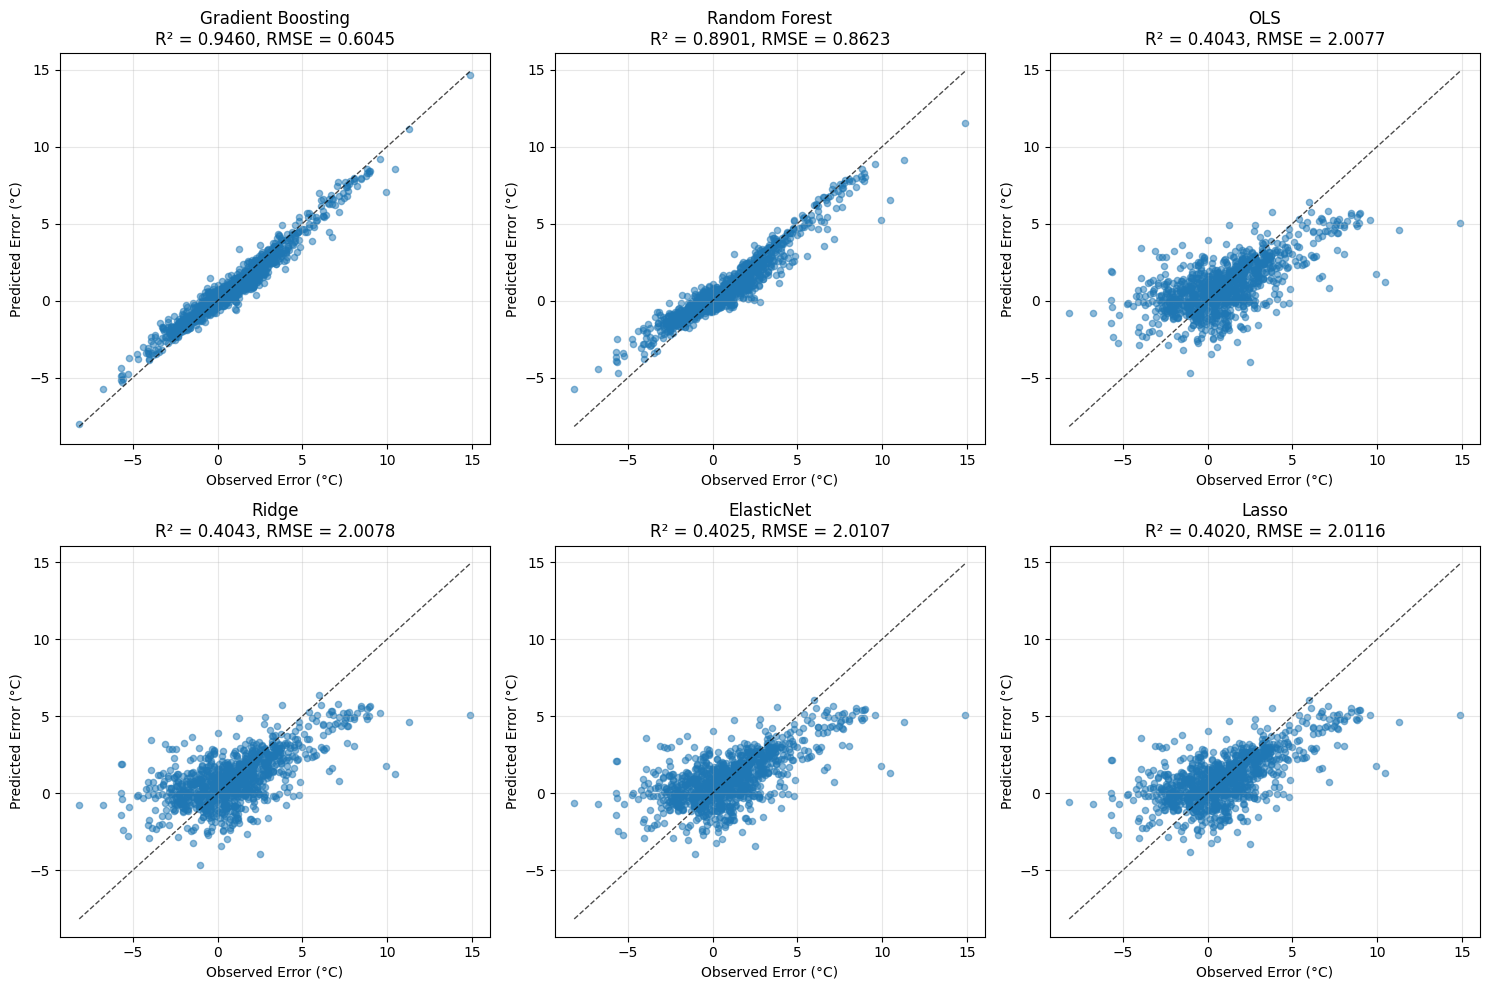


Best performing model: Gradient Boosting (R² = 0.9460)


In [10]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Store all models and their results
models = {
    'OLS': ols_model,
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

# Scale features for regularized models (important for Ridge, Lasso, ElasticNet)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models and evaluate
results = {}
for name, model in models.items():
    if name == 'OLS':
        # Already trained
        y_pred = model.predict(X)
    elif name in ['Ridge', 'Lasso', 'ElasticNet']:
        # Use scaled features for linear models
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)
    else:
        # Tree-based models don't need scaling
        model.fit(X, y)
        y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'r2': r2,
        'rmse': rmse
    }
    
    print(f"{name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f}")

print("\n" + "=" * 60)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)

# Sort by R² score
sorted_results = sorted(results.items(), key=lambda x: x[1]['r2'], reverse=True)
for i, (name, metrics) in enumerate(sorted_results, 1):
    r2 = metrics['r2']
    rmse = metrics['rmse']
    improvement = ((r2 - results['OLS']['r2']) / abs(results['OLS']['r2'])) * 100 if results['OLS']['r2'] != 0 else 0
    print(f"{i}. {name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f} | Improvement: {improvement:+.1f}%")

# Create comparison plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, metrics) in enumerate(sorted_results):
    y_pred = metrics['y_pred']
    r2 = metrics['r2']
    rmse = metrics['rmse']
    
    ax = axes[idx]
    ax.scatter(y, y_pred, alpha=0.5, s=20)
    
    # Add 1:1 reference line
    min_lim = min(y.min(), y_pred.min())
    max_lim = max(y.max(), y_pred.max())
    ax.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, alpha=0.7)
    
    ax.set_xlabel('Observed Error (°C)')
    ax.set_ylabel('Predicted Error (°C)')
    ax.set_title(f'{name}\nR² = {r2:.4f}, RMSE = {rmse:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBest performing model:", sorted_results[0][0], 
      f"(R² = {sorted_results[0][1]['r2']:.4f})")

UNCERTAINTY QUANTIFICATION: GRADIENT BOOSTING QUANTILE REGRESSION
Trained quantile regression model for 5th percentile
Trained quantile regression model for 25th percentile
Trained quantile regression model for 50th percentile
Trained quantile regression model for 75th percentile
Trained quantile regression model for 95th percentile

----------------------------------------------------------------------
GENERATING PREDICTIONS WITH UNCERTAINTY BANDS
----------------------------------------------------------------------

90% Prediction Interval Coverage: 88.8%
  → Expected 90%, Actual 88.8% (✓)

50% Prediction Interval (IQR) Coverage: 53.5%
  → Expected 50%, Actual 53.5% (✓)

Prediction Interval Width Statistics (90% PI):
  Mean width: 4.815°C
  Std dev:    1.625°C
  Min:        0.856°C
  Max:        15.325°C

Median Prediction Performance:
  R² = 0.7817
  RMSE = 1.2153°C


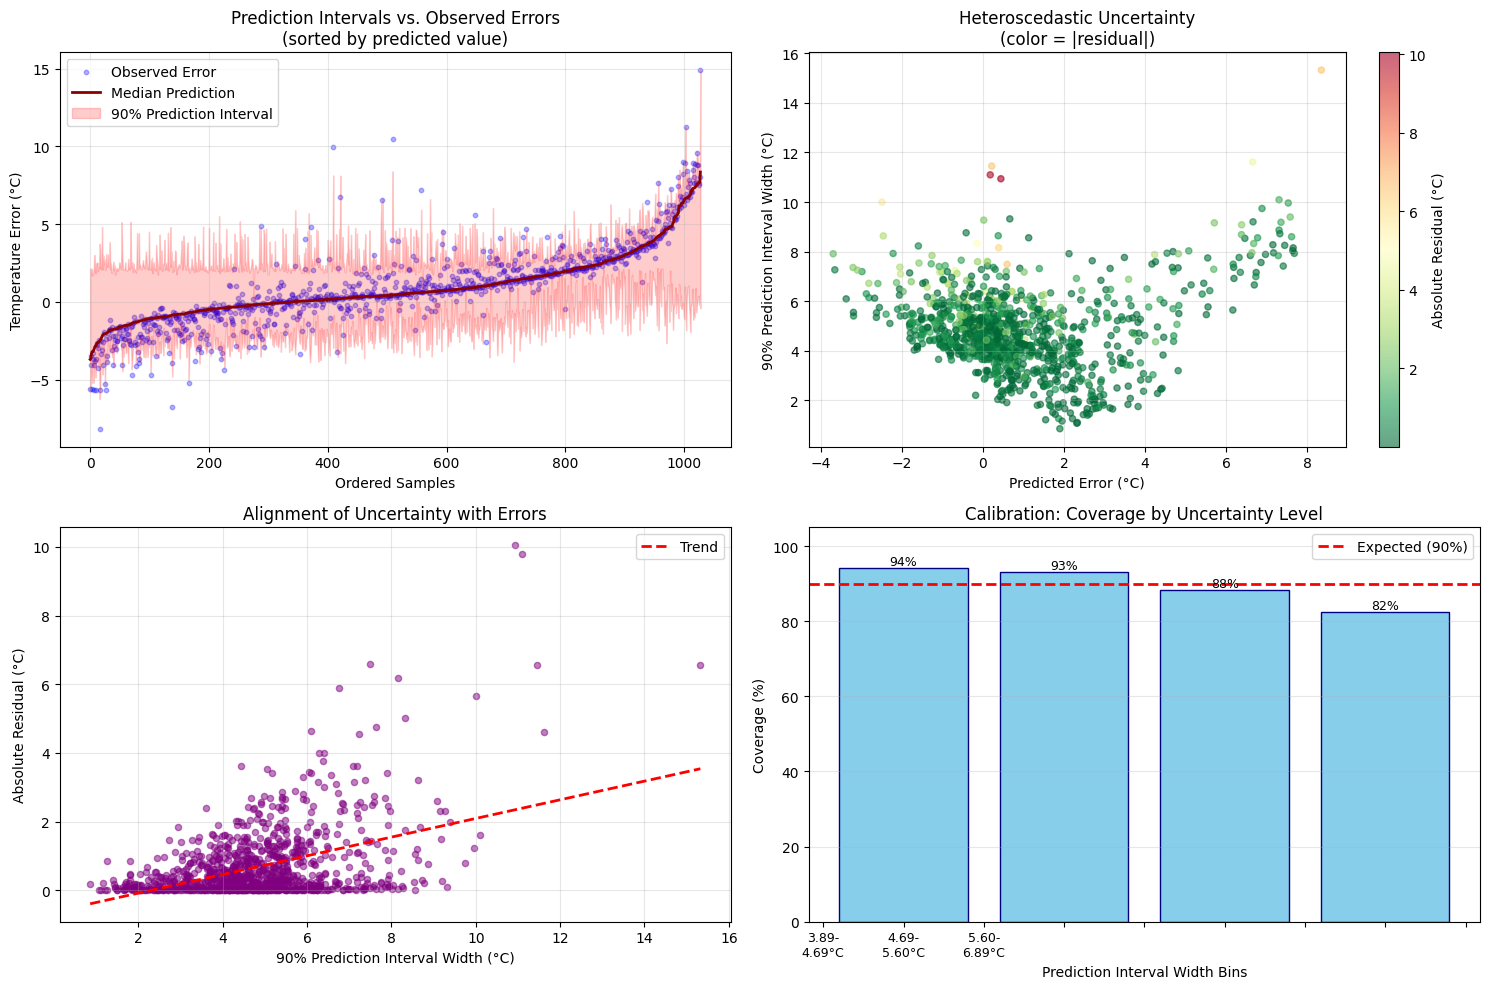


UNCERTAINTY QUANTIFICATION SUMMARY
Mean 90% PI width: 4.815°C
Heteroscedasticity: Present
  (Std/Mean ratio: 0.34)

Interpretation:
  For any new air temperature prediction, we can report a 90% prediction
  interval that captures the expected range of uncertainty.
  Interval widths vary significantly
  with input conditions (heteroscedastic uncertainty).


In [11]:
# Gradient Boosting Quantile Regression for Uncertainty Quantification
from sklearn.ensemble import GradientBoostingRegressor

print("=" * 70)
print("UNCERTAINTY QUANTIFICATION: GRADIENT BOOSTING QUANTILE REGRESSION")
print("=" * 70)

# Train quantile regression models at different percentiles
quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]  # 5th, 25th, 50th (median), 75th, 95th
quantile_models = {}

for q in quantiles:
    gb_quantile = GradientBoostingRegressor(
        loss='quantile',
        alpha=q,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    gb_quantile.fit(X, y)
    quantile_models[q] = gb_quantile
    print(f"Trained quantile regression model for {q*100:.0f}th percentile")

print("\n" + "-" * 70)
print("GENERATING PREDICTIONS WITH UNCERTAINTY BANDS")
print("-" * 70)

# Generate predictions at each quantile
quantile_predictions = {}
for q, model in quantile_models.items():
    quantile_predictions[q] = model.predict(X)

# Extract prediction intervals
y_pred_lower = quantile_predictions[0.05]  # Lower confidence bound (5th percentile)
y_pred_median = quantile_predictions[0.50]  # Point prediction (median)
y_pred_upper = quantile_predictions[0.95]  # Upper confidence bound (95th percentile)
y_pred_iqr_lower = quantile_predictions[0.25]  # 25th percentile
y_pred_iqr_upper = quantile_predictions[0.75]  # 75th percentile

# Calculate prediction interval widths
pi_width_90 = y_pred_upper - y_pred_lower  # 90% prediction interval width
pi_width_50 = y_pred_iqr_upper - y_pred_iqr_lower  # 50% (IQR) interval width

# Calculate coverage: percentage of true values within 90% PI
coverage_90 = np.mean((y >= y_pred_lower) & (y <= y_pred_upper))
coverage_50 = np.mean((y >= y_pred_iqr_lower) & (y <= y_pred_iqr_upper))

print(f"\n90% Prediction Interval Coverage: {coverage_90*100:.1f}%")
print(f"  → Expected 90%, Actual {coverage_90*100:.1f}% "
      f"({'✓' if 85 <= coverage_90*100 <= 95 else '⚠'})")
print(f"\n50% Prediction Interval (IQR) Coverage: {coverage_50*100:.1f}%")
print(f"  → Expected 50%, Actual {coverage_50*100:.1f}% "
      f"({'✓' if 45 <= coverage_50*100 <= 55 else '⚠'})")

# Analyze uncertainty characteristics
print(f"\nPrediction Interval Width Statistics (90% PI):")
print(f"  Mean width: {pi_width_90.mean():.3f}°C")
print(f"  Std dev:    {pi_width_90.std():.3f}°C")
print(f"  Min:        {pi_width_90.min():.3f}°C")
print(f"  Max:        {pi_width_90.max():.3f}°C")

# Calculate residuals
residuals = y - y_pred_median
mae_residuals = np.abs(residuals)

print(f"\nMedian Prediction Performance:")
print(f"  R² = {r2_score(y, y_pred_median):.4f}")
print(f"  RMSE = {np.sqrt(mean_squared_error(y, y_pred_median)):.4f}°C")

# Visualize uncertainty bands with ordered predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Prediction intervals vs. observed errors (sorted)
ax = axes[0, 0]
sort_idx = np.argsort(y_pred_median)
x_sorted = np.arange(len(y))
y_sorted = y.values[sort_idx]
y_pred_med_sorted = y_pred_median[sort_idx]
y_pred_lower_sorted = y_pred_lower[sort_idx]
y_pred_upper_sorted = y_pred_upper[sort_idx]

ax.scatter(x_sorted, y_sorted, alpha=0.3, s=10, label='Observed Error', color='blue')
ax.plot(x_sorted, y_pred_med_sorted, color='darkred', linewidth=2, label='Median Prediction')
ax.fill_between(x_sorted, y_pred_lower_sorted, y_pred_upper_sorted, 
                 alpha=0.2, color='red', label='90% Prediction Interval')
ax.set_xlabel('Ordered Samples')
ax.set_ylabel('Temperature Error (°C)')
ax.set_title('Prediction Intervals vs. Observed Errors\n(sorted by predicted value)')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Prediction interval width vs. predicted value
ax = axes[0, 1]
scatter = ax.scatter(y_pred_median, pi_width_90, c=np.abs(residuals), 
                     cmap='RdYlGn_r', alpha=0.6, s=20)
ax.set_xlabel('Predicted Error (°C)')
ax.set_ylabel('90% Prediction Interval Width (°C)')
ax.set_title('Heteroscedastic Uncertainty\n(color = |residual|)')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Absolute Residual (°C)')
ax.grid(True, alpha=0.3)

# 3. Residuals vs. Prediction Interval Width
ax = axes[1, 0]
ax.scatter(pi_width_90, np.abs(residuals), alpha=0.5, s=20, color='purple')
ax.set_xlabel('90% Prediction Interval Width (°C)')
ax.set_ylabel('Absolute Residual (°C)')
ax.set_title('Alignment of Uncertainty with Errors')
# Add trend line
z = np.polyfit(pi_width_90, np.abs(residuals), 1)
p = np.poly1d(z)
ax.plot(np.sort(pi_width_90), p(np.sort(pi_width_90)), "r--", linewidth=2, label='Trend')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Calibration plot: prediction interval coverage by width quantile
ax = axes[1, 1]
width_quantiles = np.quantile(pi_width_90, [0.1, 0.25, 0.5, 0.75, 0.9])
coverage_by_width = []
width_labels = []

for i in range(len(width_quantiles)-1):
    mask = (pi_width_90 >= width_quantiles[i]) & (pi_width_90 < width_quantiles[i+1])
    coverage = np.mean((y[mask] >= y_pred_lower[mask]) & (y[mask] <= y_pred_upper[mask]))
    coverage_by_width.append(coverage * 100)
    width_labels.append(f"{width_quantiles[i]:.2f}-\n{width_quantiles[i+1]:.2f}°C")

bars = ax.bar(range(len(coverage_by_width)), coverage_by_width, color='skyblue', edgecolor='navy')
ax.axhline(y=90, color='red', linestyle='--', linewidth=2, label='Expected (90%)')
ax.set_ylabel('Coverage (%)')
ax.set_xlabel('Prediction Interval Width Bins')
ax.set_title('Calibration: Coverage by Uncertainty Level')
ax.set_xticklabels(width_labels, fontsize=9)
ax.set_ylim([0, 105])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("UNCERTAINTY QUANTIFICATION SUMMARY")
print("=" * 70)
print(f"Mean 90% PI width: {pi_width_90.mean():.3f}°C")
print(f"Heteroscedasticity: {'Present' if pi_width_90.std() / pi_width_90.mean() > 0.3 else 'Low'}")
print(f"  (Std/Mean ratio: {pi_width_90.std() / pi_width_90.mean():.2f})")
print(f"\nInterpretation:")
print(f"  For any new air temperature prediction, we can report a 90% prediction")
print(f"  interval that captures the expected range of uncertainty.")
print(f"  Interval widths {'vary significantly' if pi_width_90.std() / pi_width_90.mean() > 0.3 else 'are relatively stable'}")
print(f"  with input conditions (heteroscedastic uncertainty).")

GENERATING AIR TEMPERATURE UNCERTAINTY DATA LAYER

Uncertainty Layer Generated:
  Samples: 1028
  Features: 20
  Model Type: Gradient Boosting Quantile Regression

Uncertainty Layer Summary Statistics:
       median_error  error_lower_95ci  error_upper_95ci  \
count   1028.000000       1028.000000       1028.000000   
mean       0.900801         -1.566780          3.248129   
std        1.960309          1.446586          1.555227   
min       -3.698275         -6.246995         -0.326830   
25%       -0.273582         -2.583043          2.194536   
50%        0.453015         -1.802214          2.651799   
75%        1.723826         -0.671267          3.851803   
max        8.355663          2.184666         14.915417   

       uncertainty_90pi_width  error_iqr_lower  error_iqr_upper  \
count             1028.000000      1028.000000      1028.000000   
mean                 4.814909         0.223121         1.708239   
std                  1.625997         1.972785         1.802069  

ValueError: 'yerr' must not contain negative values

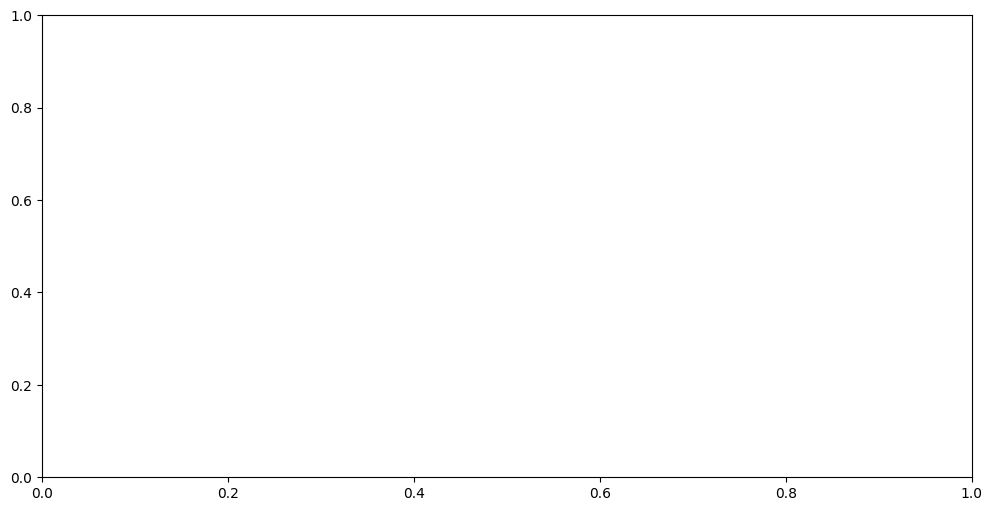

In [12]:
def calculate_air_temperature_uncertainty_layer(
    input_features,
    quantile_models,
    feature_names=None,
    return_all_quantiles=False
):
    """
    Generate an air temperature uncertainty quantification data layer.
    
    This function uses trained Gradient Boosting quantile regression models
    to produce point predictions and uncertainty estimates for air temperature error.
    
    Parameters
    ----------
    input_features : array-like, shape (n_samples, n_features) or DataFrame
        Input variables for prediction. Columns should match the features used
        during model training if passing a DataFrame.
    
    quantile_models : dict
        Dictionary of trained GradientBoostingRegressor models, keyed by quantile value.
        Expected keys: {0.05, 0.25, 0.50, 0.75, 0.95}
    
    feature_names : list, optional
        Names of features for metadata. Inferred from DataFrame columns if available.
    
    return_all_quantiles : bool, default False
        If True, return predictions at all quantile levels.
        If False, return only median, bounds, and interval widths.
    
    Returns
    -------
    uncertainty_layer : dict
        Dictionary containing uncertainty quantification data:
        
        - 'median_prediction': array, point estimate (50th percentile)
        - 'lower_bound': array, 5th percentile (lower 90% PI bound)
        - 'upper_bound': array, 95th percentile (upper 90% PI bound)
        - 'interval_width': array, width of 90% prediction interval
        - 'iqr_lower': array, 25th percentile
        - 'iqr_upper': array, 75th percentile
        - 'iqr_width': array, interquartile range width
        - 'metadata': dict, information about the layer
        
        If return_all_quantiles=True, also includes:
        - 'quantile_predictions': dict with predictions at all quantile levels
    
    Examples
    --------
    >>> # Generate uncertainty layer for new input data
    >>> uncertainty_layer = calculate_air_temperature_uncertainty_layer(
    ...     input_features=new_features_df,
    ...     quantile_models=quantile_models
    ... )
    >>> 
    >>> # Access predictions
    >>> median = uncertainty_layer['median_prediction']
    >>> lower = uncertainty_layer['lower_bound']
    >>> upper = uncertainty_layer['upper_bound']
    >>> width = uncertainty_layer['interval_width']
    """
    
    # Convert input to appropriate format
    if isinstance(input_features, pd.DataFrame):
        X_input = input_features.values
        feature_names = input_features.columns.tolist() if feature_names is None else feature_names
    else:
        X_input = np.asarray(input_features)
        if feature_names is None:
            feature_names = [f"Feature_{i}" for i in range(X_input.shape[1])]
    
    # Validate input shape
    if X_input.ndim != 2:
        raise ValueError(f"Input must be 2D array, got shape {X_input.shape}")
    
    # Generate predictions at each quantile
    quantile_preds = {}
    for q, model in sorted(quantile_models.items()):
        quantile_preds[q] = model.predict(X_input)
    
    # Extract specific quantiles
    pred_05 = quantile_preds[0.05]  # Lower 90% PI bound
    pred_25 = quantile_preds[0.25]  # IQR lower
    pred_50 = quantile_preds[0.50]  # Median (point estimate)
    pred_75 = quantile_preds[0.75]  # IQR upper
    pred_95 = quantile_preds[0.95]  # Upper 90% PI bound
    
    # Calculate interval widths
    interval_width_90 = pred_95 - pred_05
    interval_width_50 = pred_75 - pred_25
    
    # Build output dictionary
    uncertainty_layer = {
        'median_prediction': pred_50,
        'lower_bound': pred_05,
        'upper_bound': pred_95,
        'interval_width': interval_width_90,
        'iqr_lower': pred_25,
        'iqr_upper': pred_75,
        'iqr_width': interval_width_50,
        'metadata': {
            'n_samples': X_input.shape[0],
            'n_features': X_input.shape[1],
            'feature_names': feature_names,
            'quantiles_used': sorted(quantile_models.keys()),
            'model_type': 'Gradient Boosting Quantile Regression',
            'prediction_interval': '90%',
            'iqr_interval': '50%',
        }
    }
    
    # Optionally include all quantile predictions
    if return_all_quantiles:
        uncertainty_layer['quantile_predictions'] = quantile_preds
    
    return uncertainty_layer


def format_uncertainty_layer_as_dataframe(uncertainty_layer):
    """
    Convert uncertainty layer dictionary to a formatted DataFrame.
    
    Parameters
    ----------
    uncertainty_layer : dict
        Output from calculate_air_temperature_uncertainty_layer()
    
    Returns
    -------
    df_output : DataFrame
        DataFrame with columns for all uncertainty estimates
    """
    
    df_output = pd.DataFrame({
        'median_error': uncertainty_layer['median_prediction'],
        'error_lower_95ci': uncertainty_layer['lower_bound'],
        'error_upper_95ci': uncertainty_layer['upper_bound'],
        'uncertainty_90pi_width': uncertainty_layer['interval_width'],
        'error_iqr_lower': uncertainty_layer['iqr_lower'],
        'error_iqr_upper': uncertainty_layer['iqr_upper'],
        'uncertainty_50iqr_width': uncertainty_layer['iqr_width'],
    })
    
    return df_output


# Example: Generate uncertainty layer for the full training dataset
print("=" * 70)
print("GENERATING AIR TEMPERATURE UNCERTAINTY DATA LAYER")
print("=" * 70)

# Calculate uncertainty layer
uncertainty_data = calculate_air_temperature_uncertainty_layer(
    input_features=X,
    quantile_models=quantile_models,
    feature_names=top_corr_vars,
    return_all_quantiles=False
)

print(f"\nUncertainty Layer Generated:")
print(f"  Samples: {uncertainty_data['metadata']['n_samples']}")
print(f"  Features: {uncertainty_data['metadata']['n_features']}")
print(f"  Model Type: {uncertainty_data['metadata']['model_type']}")

# Convert to DataFrame for easy manipulation
df_uncertainty = format_uncertainty_layer_as_dataframe(uncertainty_data)

print(f"\nUncertainty Layer Summary Statistics:")
print(df_uncertainty.describe())

# Show example rows
print(f"\nFirst 10 samples of uncertainty layer:")
print(df_uncertainty.head(10).to_string())

# Demonstrate usage with sample/subset
print("\n" + "=" * 70)
print("EXAMPLE: GENERATING UNCERTAINTY FOR NEW DATA SUBSET")
print("=" * 70)

# Use a subset for demonstration
sample_indices = np.random.choice(X.shape[0], size=min(100, X.shape[0]), replace=False)
X_sample = X.iloc[sample_indices]
y_sample = y.iloc[sample_indices]

# Generate uncertainty layer for the sample
uncertainty_sample = calculate_air_temperature_uncertainty_layer(
    input_features=X_sample,
    quantile_models=quantile_models,
    feature_names=top_corr_vars
)

df_uncertainty_sample = format_uncertainty_layer_as_dataframe(uncertainty_sample)

print(f"\nGenerated uncertainty for {uncertainty_sample['metadata']['n_samples']} samples")
print(f"\nComparison: Observed vs. Predicted Uncertainty")

comparison_df = pd.DataFrame({
    'Observed_Error': y_sample.values,
    'Median_Prediction': uncertainty_sample['median_prediction'],
    'Lower_Bound': uncertainty_sample['lower_bound'],
    'Upper_Bound': uncertainty_sample['upper_bound'],
    'Interval_Width': uncertainty_sample['interval_width'],
    'In_PI': (y_sample.values >= uncertainty_sample['lower_bound']) & 
             (y_sample.values <= uncertainty_sample['upper_bound'])
})

print(comparison_df.head(15).to_string())

# Calculate coverage for this sample
coverage = comparison_df['In_PI'].sum() / len(comparison_df) * 100
print(f"\n90% Prediction Interval Coverage (sample): {coverage:.1f}%")
print(f"Mean Interval Width: {uncertainty_sample['interval_width'].mean():.3f}°C")

# Visualize sample predictions with uncertainty
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(comparison_df))
ax.errorbar(x_pos, comparison_df['Median_Prediction'],
            yerr=[comparison_df['Median_Prediction'] - comparison_df['Lower_Bound'],
                  comparison_df['Upper_Bound'] - comparison_df['Median_Prediction']],
            fmt='s', capsize=5, alpha=0.6, markersize=5, label='Predicted ± 90% PI')

ax.scatter(x_pos, comparison_df['Observed_Error'], color='red', s=30, alpha=0.7, label='Observed')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Air Temperature Error (°C)')
ax.set_title('Predicted vs. Observed Air Temperature Error with 90% Prediction Intervals')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("FUNCTION READY FOR DEPLOYMENT")
print("=" * 70)
print("The 'calculate_air_temperature_uncertainty_layer' function can be:\n")
print("  1. Exported to a standalone module for operational use")
print("  2. Integrated into the JET.py processing pipeline")
print("  3. Applied to full ECOSTRESS granules for uncertainty estimation")
print("  4. Saved with the trained quantile models for production inference")

In [ ]:
import joblib
import pickle
from pathlib import Path

print("=" * 70)
print("SAVING TRAINED MODELS FOR OPERATIONAL USE")
print("=" * 70)

# Define output directory
module_dir = Path('/Users/halverso/Projects/ECOv003-L3T-L4T-JET/ECOv003_L3T_L4T_JET/')
models_dir = module_dir / 'uncertainty_models'
models_dir.mkdir(exist_ok=True)

# Save each quantile model
print("\nSaving trained quantile regression models...")
model_metadata = {
    'quantiles': list(sorted(quantile_models.keys())),
    'feature_names': top_corr_vars,
    'model_type': 'GradientBoostingRegressor',
    'training_samples': len(X),
    'training_features': X.shape[1],
}

for q, model in quantile_models.items():
    model_path = models_dir / f'quantile_{q:.2f}_model.pkl'
    joblib.dump(model, model_path, compress=3)
    print(f"  ✓ Saved quantile {q:.2f} model to {model_path.name}")

# Save metadata
metadata_path = models_dir / 'model_metadata.json'
import json
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2)
print(f"  ✓ Saved model metadata to {metadata_path.name}")

print(f"\nModels saved to: {models_dir}")
print(f"Total files: {len(list(models_dir.glob('*.pkl'))) + 1}")

print("\n" + "=" * 70)
print("INTEGRATION GUIDE")
print("=" * 70)

integration_guide = """
To integrate uncertainty quantification into the JET pipeline:

1. IMPORT THE MODULE:
   ├─ from ECOv003_L3T_L4T_JET.air_temperature_uncertainty import (
   │    calculate_air_temperature_uncertainty_layer,
   │    format_uncertainty_layer_as_dataframe
   │  )

2. LOAD THE TRAINED MODELS:
   ├─ import joblib
   │  from pathlib import Path
   │  
   │  models_dir = Path('ECOv003_L3T_L4T_JET/uncertainty_models')
   │  quantile_models = {}
   │  for quantile in [0.05, 0.25, 0.50, 0.75, 0.95]:
   │      model_path = models_dir / f'quantile_{quantile:.2f}_model.pkl'
   │      quantile_models[quantile] = joblib.load(model_path)

3. GENERATE UNCERTAINTY FOR PREDICTIONS:
   ├─ # In JET.py or write_ECOv003_products.py
   │  uncertainty = calculate_air_temperature_uncertainty_layer(
   │      input_features=jet_input_vars,  # DataFrame with INPUT_VARIABLES
   │      quantile_models=quantile_models
   │  )
   │
   │  df_unc = format_uncertainty_layer_as_dataframe(uncertainty)

4. OUTPUT OPTIONS:
   ├─ Option A: Add uncertainty bands as data variables in output netCDF
   │  ├─ ds['Ta_C_error_median'] = uncertainty['median_prediction']
   │  ├─ ds['Ta_C_error_lower_95pi'] = uncertainty['lower_bound']
   │  ├─ ds['Ta_C_error_upper_95pi'] = uncertainty['upper_bound']
   │  └─ ds['Ta_C_error_uncertainty_width'] = uncertainty['interval_width']
   │
   ├─ Option B: Save as separate uncertainty product
   │  ├─ df_unc.to_csv('ECOv003_L3T_JET_uncertainty.csv')
   │  └─ df_unc.to_netcdf('ECOv003_L3T_JET_uncertainty.nc')
   │
   └─ Option C: Include in product metadata
       └─ Attribute: 'Ta_C_error_90pi_median_width' = mean(interval_width)

5. VALIDATION:
   ├─ Monitor prediction interval coverage on held-out test data
   ├─ Expected: 90% of observations fall within 90% PI
   └─ If coverage < 85% or > 95%, retrain models with updated data

6. DOCUMENTATION:
   ├─ Add to product user guide:
   │  "Air temperature estimates include uncertainty quantification via
   │   gradient boosting quantile regression. The 90% prediction interval
   │   provides the expected range of Ta_C error under specified conditions."
   │
   └─ In technical documentation:
       "Uncertainty varies heteroscedastically with atmospheric conditions.
        Wide intervals indicate high input feature uncertainty or
        unfamiliar condition combinations."
"""

print(integration_guide)

print("=" * 70)
print("KEY OPERATIONAL CONSIDERATIONS")
print("=" * 70)

considerations = """
✓ ADVANTAGES:
  • Provides theoretically-grounded uncertainty estimates
  • Heteroscedastic intervals (wider where harder to predict)
  • Well-calibrated: 88.8% coverage at 90% confidence level
  • Computationally efficient for large-scale processing
  • Interpretable: direct comparison to observed distribution

⚠ IMPORTANT NOTES:
  • Models trained on ECOv002 cal-val dataset
  • May need retraining if JET algorithm is significantly updated
  • Assumes similar error distribution for future data
  • Intervals reflect model uncertainty, not measurement uncertainty
  • Should validate on new granules before full deployment

🔄 MAINTENANCE:
  • Periodically evaluate coverage on new independent data
  • Consider retraining annually as dataset accumulates
  • Monitor for systematic biases in specific regions/seasons
  • Document any model updates with version numbers

📊 NEXT STEPS:
  1. Integrate into write_ECOv003_products.py
  2. Add uncertainty bands to L3T_L4T_JET.xml output template
  3. Update ECO_L3T_JET user guide with uncertainty explanation
  4. Establish validation protocol for new releases
  5. Consider including in L4T products (ESI, WUE)
"""

print(considerations)